In [410]:
# Time to analyze the stored data.

import pandas as pd
DataFrame=pd.read_csv("C:/Users\Sergi\Desktop\TFT.csv")
DataFrame.head()

,Unnamed: 0,matchId,hour,day,month,release,playerPuuid,LastRoundAlive,playerEndingGame,EndGameTime,...,Ctype4,TierC4,Ctype5,TierC5,Ctype6,TierC6,Ctype7,TierC7,Ctype8,TierC8
0,0,EUW1_4627054925,20,27,5,10.1,-3to15uUjeOneXycYfZw2aDG4QMWyhMIuJIzIWQpBwLchH...,30,6,1688.711304,...,-,-,-,-,-,-,-,-,-,-
1,0,EUW1_4627054925,20,27,5,10.1,1FmO7Husl99J9_MrAGQMlkLaFv4c1xCsKU6t6N69RNsFkg...,34,3,1926.799561,...,Set3_Blademaster,1,Set3_Celestial,1,Set3_Mystic,1,-,-,-,-
2,0,EUW1_4627054925,20,27,5,10.1,MQvp6_GJH_jIWSO9gkRt4ug7MewLZyRmScbwF579Wz7cIR...,35,1,1937.986938,...,Set3_Mystic,1,Sniper,1,-,-,-,-,-,-
3,0,EUW1_4627054925,20,27,5,10.1,N0sSGfAvZ69cBVM2W-ms2tsszL8vwVeiCOE44sbOiuve1N...,33,4,1852.317139,...,-,-,-,-,-,-,-,-,-,-
4,0,EUW1_4627054925,20,27,5,10.1,Kf_uyA2ZyVuCo3v840kQk7uOJs7b-OopScMRJl_e949p42...,31,5,1749.444580,...,Set3_Blademaster,1,Set3_Celestial,1,Set3_Mystic,1,Valkyrie,1,-,-


In [411]:
# Checking features types.
print(DataFrame.dtypes) 

Unnamed: 0            int64
matchId              object
hour                  int64
day                   int64
month                 int64
release             float64
playerPuuid          object
LastRoundAlive        int64
playerEndingGame      int64
EndGameTime         float64
Ctype1               object
TierC1               object
Ctype2               object
TierC2               object
Ctype3               object
TierC3               object
Ctype4               object
TierC4               object
Ctype5               object
TierC5               object
Ctype6               object
TierC6               object
Ctype7               object
TierC7               object
Ctype8               object
TierC8               object
dtype: object


In [412]:
'''
Will be necessary to work with compositions as long as are defined as the name but in order to analyze numerically. 
'''

# Considering this amount of classes, we could iterate every row and apply somehow a "hot encoding" transforming from the
# current structure, to 0-1 based in that composition
basicInfo = DataFrame.iloc[:,:10]
transformTest = DataFrame.iloc[:,10:]

In [413]:
transformTest

,Ctype1,TierC1,Ctype2,TierC2,Ctype3,TierC3,Ctype4,TierC4,Ctype5,TierC5,Ctype6,TierC6,Ctype7,TierC7,Ctype8,TierC8
0,Blaster,2,Chrono,1,Set3_Brawler,2,-,-,-,-,-,-,-,-,-,-
1,Chrono,1,Cybernetic,1,ManaReaver,1,Set3_Blademaster,1,Set3_Celestial,1,Set3_Mystic,1,-,-,-,-
2,Chrono,1,Set3_Blademaster,1,Set3_Celestial,2,Set3_Mystic,1,Sniper,1,-,-,-,-,-,-
3,Chrono,1,Mercenary,1,Set3_Sorcerer,3,-,-,-,-,-,-,-,-,-,-
4,Chrono,1,ManaReaver,1,Mercenary,1,Set3_Blademaster,1,Set3_Celestial,1,Set3_Mystic,1,Valkyrie,1,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,Blaster,1,Cybernetic,2,Infiltrator,1,ManaReaver,1,Mercenary,1,Set3_Blademaster,1,Set3_Celestial,1,-,-
3196,Demolitionist,1,Infiltrator,2,MechPilot,1,Mercenary,1,Set3_Celestial,1,Set3_Sorcerer,1,Valkyrie,1,-,-
3197,Blaster,1,Rebel,2,Set3_Blademaster,1,-,-,-,-,-,-,-,-,-,-
3198,Blaster,1,Rebel,1,Set3_Brawler,2,Set3_Mystic,1,-,-,-,-,-,-,-,-


In [414]:
import numpy as np
from operator import add
import json
# It's necessary to know which are the unique values. for doing it, we'll create a huge list of all types and then apply unique()
totalCompos = []

# Let's assume in the first column we'll find all the compositions (although might be not)
compos = list(transformTest["Ctype1"].unique())

# Now, we'll have a look into the remaining columns. As long as all shall be there, we just need to check if those
# comps are there.
for a in range(2, transformTest.shape[1],2):
    currentCompos = transformTest.iloc[:,a]
    for comp in currentCompos:
        if comp not in compos:
            compos.append(comp)

cleanCompos = []
for i in range(0,len(compos)):
    if compos[i] != "-":
        cleanCompos.append(compos[i])
        cleanCompos.append(compos[i]+ "level")

        
# Create the treatment dataframe
treatDf = pd.DataFrame(columns = cleanCompos)

# Iterate all the rows in order to create the one hot encoding

transformTest.shape[0]
for i in range(0, transformTest.shape[0]):
    actualPlayerXGame = transformTest.iloc[i] # Remember, it's a list! Couple = composition, odd = level of the composition
    binaryPlayer = []
    for values in range(0,len(actualPlayerXGame),2): # Selecting just the compos one by one
        for compo in range(0,len(cleanCompos),2):
            if actualPlayerXGame[values] == cleanCompos[compo]:
                binaryPlayer.append(1)# Append the one hot encoding compo 
                binaryPlayer.append(int(actualPlayerXGame[values+1])) # Append composition level
            else:
                binaryPlayer.append(0) # Composition
                binaryPlayer.append(0) # Composition level
        # Time to split & merge binaryPlayer
    split = np.array_split(binaryPlayer, 8.0)

    final = np.zeros(46)
    for a in split:
        final = final + a
        # final variable is what we have to append for each player to our new dataframe
            
    df2 = pd.DataFrame({cleanCompos[0]:[final[0]],cleanCompos[1]:[final[1]],cleanCompos[2]:[final[2]],cleanCompos[3]:[final[3]],
                       cleanCompos[4]:[final[4]],cleanCompos[5]:[final[5]],cleanCompos[6]:[final[6]],cleanCompos[7]:[final[7]],
                       cleanCompos[8]:[final[8]],cleanCompos[9]:[final[9]],cleanCompos[10]:[int(final[10])],cleanCompos[11]:[final[11]],
                       cleanCompos[12]:[final[12]], 
                       cleanCompos[13]:[final[13]],cleanCompos[14]:[final[14]],cleanCompos[15]:[final[15]],cleanCompos[16]:[final[16]],
                       cleanCompos[17]:[final[17]],cleanCompos[18]:[final[18]],cleanCompos[19]:[final[19]],cleanCompos[20]:[final[20]],
                       cleanCompos[21]:[final[21]],cleanCompos[22]:[final[22]],cleanCompos[23]:[final[23]],cleanCompos[24]:[final[24]],
                       cleanCompos[25]:[final[25]],cleanCompos[26]:[final[26]],cleanCompos[27]:[final[27]],cleanCompos[28]:[final[28]],
                       cleanCompos[29]:[final[29]],cleanCompos[30]:[final[30]],cleanCompos[31]:[final[31]],cleanCompos[32]:[final[32]],
                       cleanCompos[33]:[final[33]],cleanCompos[34]:[final[34]],cleanCompos[35]:[final[35]],cleanCompos[36]:[final[36]],
                       cleanCompos[37]:[final[37]],cleanCompos[38]:[final[38]],cleanCompos[39]:[final[39]],cleanCompos[40]:[final[40]],
                       cleanCompos[41]:[final[41]],cleanCompos[42]:[final[42]],cleanCompos[43]:[final[43]],cleanCompos[44]:[final[44]],
                       cleanCompos[45]:[final[45]]})
        

    treatDf = treatDf.append(df2, ignore_index = True)
    
    #treatDf = treatDf.append(df2, ignore_index = True)

In [415]:
treatDf.head()

3200


,Blaster,Blasterlevel,Chrono,Chronolevel,ManaReaver,ManaReaverlevel,Demolitionist,Demolitionistlevel,Infiltrator,Infiltratorlevel,...,Vanguard,Vanguardlevel,Set3_Void,Set3_Voidlevel,Valkyrie,Valkyrielevel,SpacePirate,SpacePiratelevel,Starship,Starshiplevel
0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [416]:
# Combine both datasets (previous info + binarized table)
result = pd.concat([basicInfo, treatDf], axis=1)
result.keys()

Index(['Unnamed: 0', 'matchId', 'hour', 'day', 'month', 'release',
       'playerPuuid', 'LastRoundAlive', 'playerEndingGame', 'EndGameTime',
       'Blaster', 'Blasterlevel', 'Chrono', 'Chronolevel', 'ManaReaver',
       'ManaReaverlevel', 'Demolitionist', 'Demolitionistlevel', 'Infiltrator',
       'Infiltratorlevel', 'DarkStar', 'DarkStarlevel', 'Cybernetic',
       'Cyberneticlevel', 'Set3_Sorcerer', 'Set3_Sorcererlevel', 'Mercenary',
       'Mercenarylevel', 'Rebel', 'Rebellevel', 'MechPilot', 'MechPilotlevel',
       'Set3_Brawler', 'Set3_Brawlerlevel', 'Protector', 'Protectorlevel',
       'Set3_Mystic', 'Set3_Mysticlevel', 'Set3_Celestial',
       'Set3_Celestiallevel', 'Set3_Blademaster', 'Set3_Blademasterlevel',
       'StarGuardian', 'StarGuardianlevel', 'Sniper', 'Sniperlevel',
       'Vanguard', 'Vanguardlevel', 'Set3_Void', 'Set3_Voidlevel', 'Valkyrie',
       'Valkyrielevel', 'SpacePirate', 'SpacePiratelevel', 'Starship',
       'Starshiplevel'],
      dtype='object')

In [417]:
# Check releases. We'll use mainly the last one (10.10 which in this case is 10.1)
result.release.unique()

array([10.1 , 10.11, 10.9 ])

In [418]:
# Let's just maintain those games from the last patch
filteredDataFrame = result[result["release"] == 10.1]

In [420]:
'''
Now let's get some insights about endgame score and  just the compositions.
'''
# Check dataframe's features
filteredDataFrame.keys()

Index(['Unnamed: 0', 'matchId', 'hour', 'day', 'month', 'release',
       'playerPuuid', 'LastRoundAlive', 'playerEndingGame', 'EndGameTime',
       'Blaster', 'Blasterlevel', 'Chrono', 'Chronolevel', 'ManaReaver',
       'ManaReaverlevel', 'Demolitionist', 'Demolitionistlevel', 'Infiltrator',
       'Infiltratorlevel', 'DarkStar', 'DarkStarlevel', 'Cybernetic',
       'Cyberneticlevel', 'Set3_Sorcerer', 'Set3_Sorcererlevel', 'Mercenary',
       'Mercenarylevel', 'Rebel', 'Rebellevel', 'MechPilot', 'MechPilotlevel',
       'Set3_Brawler', 'Set3_Brawlerlevel', 'Protector', 'Protectorlevel',
       'Set3_Mystic', 'Set3_Mysticlevel', 'Set3_Celestial',
       'Set3_Celestiallevel', 'Set3_Blademaster', 'Set3_Blademasterlevel',
       'StarGuardian', 'StarGuardianlevel', 'Sniper', 'Sniperlevel',
       'Vanguard', 'Vanguardlevel', 'Set3_Void', 'Set3_Voidlevel', 'Valkyrie',
       'Valkyrielevel', 'SpacePirate', 'SpacePiratelevel', 'Starship',
       'Starshiplevel'],
      dtype='object')

In [525]:
'''
Overall, as long as we want to visualize correlation between endgame position and composition, the rest of the information 
for this moment is unnecessary, we'll also convert all features to integer type.
From 10th feature to the end (blaster) would be a great practice to get them as integers as long as all of them are integers,
types are basically binary and levels integers within a range (0-4).
'''

workingDF = filteredDataFrame.iloc[:, 8:] 

workingDF.pop("EndGameTime") # Erase this feature

0       1688.711304
1       1926.799561
2       1937.986938
3       1852.317139
4       1749.444580
           ...     
3195    1864.405151
3196    2159.099609
3197    1535.077881
3198    1630.270752
3199    2159.099609
Name: EndGameTime, Length: 2152, dtype: float64

In [424]:
workingDF.dtypes

playerEndingGame           int64
Blaster                  float64
Blasterlevel             float64
Chrono                   float64
Chronolevel              float64
ManaReaver               float64
ManaReaverlevel          float64
Demolitionist            float64
Demolitionistlevel       float64
Infiltrator              float64
Infiltratorlevel         float64
DarkStar                  object
DarkStarlevel            float64
Cybernetic               float64
Cyberneticlevel          float64
Set3_Sorcerer            float64
Set3_Sorcererlevel       float64
Mercenary                float64
Mercenarylevel           float64
Rebel                    float64
Rebellevel               float64
MechPilot                float64
MechPilotlevel           float64
Set3_Brawler             float64
Set3_Brawlerlevel        float64
Protector                float64
Protectorlevel           float64
Set3_Mystic              float64
Set3_Mysticlevel         float64
Set3_Celestial           float64
Set3_Celes

In [425]:
# Casting values to float as long as we're just working with integer values.
workingDF = workingDF.astype('int64')

In [426]:
workingDF.dtypes

playerEndingGame         int64
Blaster                  int64
Blasterlevel             int64
Chrono                   int64
Chronolevel              int64
ManaReaver               int64
ManaReaverlevel          int64
Demolitionist            int64
Demolitionistlevel       int64
Infiltrator              int64
Infiltratorlevel         int64
DarkStar                 int64
DarkStarlevel            int64
Cybernetic               int64
Cyberneticlevel          int64
Set3_Sorcerer            int64
Set3_Sorcererlevel       int64
Mercenary                int64
Mercenarylevel           int64
Rebel                    int64
Rebellevel               int64
MechPilot                int64
MechPilotlevel           int64
Set3_Brawler             int64
Set3_Brawlerlevel        int64
Protector                int64
Protectorlevel           int64
Set3_Mystic              int64
Set3_Mysticlevel         int64
Set3_Celestial           int64
Set3_Celestiallevel      int64
Set3_Blademaster         int64
Set3_Bla

In [434]:
# we only want to select the compo not the level (at least for now) which are odd values.
desiredFeatures = []
desiredFeatures.append(workingDF.keys()[0])
for i in range(1,len(workingDF.keys()),2):
    desiredFeatures.append(workingDF.keys()[i])

# Now we have to select from the dataframe this elements to a new dataframe
finalDF = workingDF.loc[ : , desiredFeatures ]
finalDF

,playerEndingGame,Blaster,Chrono,ManaReaver,Demolitionist,Infiltrator,DarkStar,Cybernetic,Set3_Sorcerer,Mercenary,...,Set3_Mystic,Set3_Celestial,Set3_Blademaster,StarGuardian,Sniper,Vanguard,Set3_Void,Valkyrie,SpacePirate,Starship
0,6,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,1,1,0,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
3,4,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,1,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3,1,0,1,0,1,0,1,0,1,...,0,1,1,0,0,0,0,0,0,0
3196,1,0,0,0,1,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
3197,6,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3198,5,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [438]:
corrMatrix = finalDF.corr()
corrMatrix.head()

,playerEndingGame,Blaster,Chrono,ManaReaver,Demolitionist,Infiltrator,DarkStar,Cybernetic,Set3_Sorcerer,Mercenary,...,Set3_Mystic,Set3_Celestial,Set3_Blademaster,StarGuardian,Sniper,Vanguard,Set3_Void,Valkyrie,SpacePirate,Starship
playerEndingGame,1.000000,-0.007313,-0.121354,-0.095008,-0.107699,-0.044326,0.008838,0.025810,-0.026101,-0.122004,...,-0.224210,-0.067230,-0.040275,0.064594,-0.031970,0.041989,-0.097354,-0.084515,-0.042743,-0.087969
Blaster,-0.007313,1.000000,-0.056625,-0.223474,0.241247,-0.283647,-0.147610,0.088675,-0.360690,0.451562,...,0.010248,-0.384086,-0.212290,-0.150840,-0.286203,-0.228049,-0.195500,-0.024057,-0.027566,0.420031
Chrono,-0.121354,-0.056625,1.000000,0.274686,-0.329252,-0.206639,-0.134907,-0.067394,-0.202479,0.021407,...,0.053292,0.284947,0.359991,-0.091779,0.113170,0.141506,0.167644,0.059586,-0.091283,-0.194013
ManaReaver,-0.095008,-0.223474,0.274686,1.000000,-0.263243,-0.263756,-0.041756,0.285162,-0.418494,0.033781,...,0.133800,0.624601,0.561203,-0.185174,0.099400,0.282150,-0.233350,0.292247,0.146328,-0.207601
Demolitionist,-0.107699,0.241247,-0.329252,-0.263243,1.000000,0.039516,-0.061049,-0.161723,0.028985,0.421139,...,-0.011663,-0.294123,-0.329904,-0.002390,-0.102807,-0.138763,-0.100102,-0.048939,0.196488,0.297476


In [440]:
'''
This correlation matrix gives us a breaf idea about how are the compositions played together and how correlated are with the
result of the game. 

In this situation, we're just looking for the winner (playerEndingGame = 1) so let's work a little bit more, defining a binary
column (such as the rest) where the "true" value is first position, and the rest are just 0.
'''
EndingGameBinarized = []
for a in finalDF["playerEndingGame"]:
    if a == 1:
        EndingGameBinarized.append(1)
    else:
        EndingGameBinarized.append(0)

In [441]:
finalDF.playerEndingGame = EndingGameBinarized

In [442]:
finalDF.head()

,playerEndingGame,Blaster,Chrono,ManaReaver,Demolitionist,Infiltrator,DarkStar,Cybernetic,Set3_Sorcerer,Mercenary,...,Set3_Mystic,Set3_Celestial,Set3_Blademaster,StarGuardian,Sniper,Vanguard,Set3_Void,Valkyrie,SpacePirate,Starship
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,1,0,0


In [444]:
corrMatrix2 = finalDF.corr()
corrMatrix2

,playerEndingGame,Blaster,Chrono,ManaReaver,Demolitionist,Infiltrator,DarkStar,Cybernetic,Set3_Sorcerer,Mercenary,...,Set3_Mystic,Set3_Celestial,Set3_Blademaster,StarGuardian,Sniper,Vanguard,Set3_Void,Valkyrie,SpacePirate,Starship
playerEndingGame,1.000000e+00,0.014250,0.062984,0.031886,0.096072,0.028791,3.452780e-16,-0.040641,0.015603,0.048603,...,0.144019,0.019349,-0.002157,-0.045804,-0.008554,-0.051948,0.075880,0.023584,0.056901,0.092462
Blaster,1.424995e-02,1.000000,-0.056625,-0.223474,0.241247,-0.283647,-1.476102e-01,0.088675,-0.360690,0.451562,...,0.010248,-0.384086,-0.212290,-0.150840,-0.286203,-0.228049,-0.195500,-0.024057,-0.027566,0.420031
Chrono,6.298414e-02,-0.056625,1.000000,0.274686,-0.329252,-0.206639,-1.349072e-01,-0.067394,-0.202479,0.021407,...,0.053292,0.284947,0.359991,-0.091779,0.113170,0.141506,0.167644,0.059586,-0.091283,-0.194013
ManaReaver,3.188570e-02,-0.223474,0.274686,1.000000,-0.263243,-0.263756,-4.175594e-02,0.285162,-0.418494,0.033781,...,0.133800,0.624601,0.561203,-0.185174,0.099400,0.282150,-0.233350,0.292247,0.146328,-0.207601
Demolitionist,9.607197e-02,0.241247,-0.329252,-0.263243,1.000000,0.039516,-6.104891e-02,-0.161723,0.028985,0.421139,...,-0.011663,-0.294123,-0.329904,-0.002390,-0.102807,-0.138763,-0.100102,-0.048939,0.196488,0.297476
Infiltrator,2.879072e-02,-0.283647,-0.206639,-0.263756,0.039516,1.000000,-5.242918e-02,0.036717,0.583152,-0.317356,...,-0.270691,-0.395290,-0.300530,-0.115665,-0.233780,-0.232044,0.537754,0.011527,-0.151530,-0.139491
DarkStar,3.452780e-16,-0.147610,-0.134907,-0.041756,-0.061049,-0.052429,1.000000e+00,-0.067938,0.183212,-0.144773,...,0.203195,0.163429,-0.183150,-0.008400,0.376485,0.153640,-0.071271,-0.111477,-0.041436,-0.071171
Cybernetic,-4.064056e-02,0.088675,-0.067394,0.285162,-0.161723,0.036717,-6.793769e-02,1.000000,-0.166008,-0.069521,...,-0.123461,0.033300,0.303323,-0.069424,-0.129602,0.041056,-0.089979,0.013650,-0.082005,-0.081876
Set3_Sorcerer,1.560268e-02,-0.360690,-0.202479,-0.418494,0.028985,0.583152,1.832124e-01,-0.166008,1.000000,-0.282652,...,-0.242831,-0.424284,-0.475758,0.413673,-0.143954,-0.079156,0.512981,-0.152443,-0.128445,-0.166059
Mercenary,4.860287e-02,0.451562,0.021407,0.033781,0.421139,-0.317356,-1.447731e-01,-0.069521,-0.282652,1.000000,...,0.104572,-0.094514,-0.012088,-0.015813,-0.245761,0.030116,-0.229018,0.389083,0.128441,0.252744


In [452]:
'''
With that, we can see there's no OverPowered composition for the 1st place, for further analysis, let's get some numbers
from all 1st positions.
'''

firstPositionDF = finalDF [finalDF["playerEndingGame"] == 1]
firstPositionDF.shape[0] # Check all 1st positions are there (finalDF/8 is True)

# As long as this dataframe is just about the 1st positions and the selected ones are all that position, we can pop the column
firstPositionDF.pop("playerEndingGame")
firstPositionDF.head()

,Blaster,Chrono,ManaReaver,Demolitionist,Infiltrator,DarkStar,Cybernetic,Set3_Sorcerer,Mercenary,Rebel,...,Set3_Mystic,Set3_Celestial,Set3_Blademaster,StarGuardian,Sniper,Vanguard,Set3_Void,Valkyrie,SpacePirate,Starship
2,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
18,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
26,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
37,0,1,1,0,0,0,0,0,1,0,...,1,1,1,0,0,1,0,1,0,0


In [465]:
'''
Now it's time to analyse statistically what's going on within the winners from this games. Describe method allows us to get
an insight about the data, giving us a global count, mean, standard deviation, min, max and quartiles. From this fields,
we'll erase min and max (we're just analyzing a binary dataset).
'''
dataFrameDescription = firstPositionDF.describe()

dataFrameDescription.drop(["min", "max"])


,Blaster,Chrono,ManaReaver,Demolitionist,Infiltrator,DarkStar,Cybernetic,Set3_Sorcerer,Mercenary,Rebel,...,Set3_Mystic,Set3_Celestial,Set3_Blademaster,StarGuardian,Sniper,Vanguard,Set3_Void,Valkyrie,SpacePirate,Starship
count,269.000000,269.00000,269.00000,269.000000,269.000000,269.000000,269.00000,269.00000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.286245,0.72119,0.39777,0.371747,0.234201,0.055762,0.04461,0.27881,0.527881,0.226766,...,0.453532,0.498141,0.390335,0.029740,0.178439,0.174721,0.152416,0.275093,0.133829,0.144981
std,0.452848,0.44925,0.49035,0.484172,0.424288,0.229889,0.20683,0.44925,0.500153,0.419520,...,0.498764,0.500929,0.488735,0.170185,0.383595,0.380436,0.360094,0.447393,0.341103,0.352738
25%,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.00000,1.00000,1.000000,0.000000,0.000000,0.00000,1.00000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [528]:
values = []
for a in range(0,len(dataFrameDescription.keys())):
        values.append([dataFrameDescription.keys()[a],"{:.2f}".format(100*dataFrameDescription.iloc[1:2,a]["mean"])])

def sortFunction(e):
    return float(e[1])

values.sort(reverse=False,key=sortFunction) # Sort by values 

In [531]:
sortedComp = []
sortedResult = []
for results in values:
    sortedComp.append(results[0])
    sortedResult.append(results[1])
    print("Composition:", results[0], "- usage:", results[1],"%")

Composition: StarGuardian - usage: 2.97 %
Composition: Cybernetic - usage: 4.46 %
Composition: DarkStar - usage: 5.58 %
Composition: MechPilot - usage: 7.81 %
Composition: SpacePirate - usage: 13.38 %
Composition: Starship - usage: 14.50 %
Composition: Set3_Void - usage: 15.24 %
Composition: Vanguard - usage: 17.47 %
Composition: Protector - usage: 17.84 %
Composition: Sniper - usage: 17.84 %
Composition: Rebel - usage: 22.68 %
Composition: Infiltrator - usage: 23.42 %
Composition: Valkyrie - usage: 27.51 %
Composition: Set3_Sorcerer - usage: 27.88 %
Composition: Blaster - usage: 28.62 %
Composition: Set3_Brawler - usage: 29.37 %
Composition: Demolitionist - usage: 37.17 %
Composition: Set3_Blademaster - usage: 39.03 %
Composition: ManaReaver - usage: 39.78 %
Composition: Set3_Mystic - usage: 45.35 %
Composition: Set3_Celestial - usage: 49.81 %
Composition: Mercenary - usage: 52.79 %
Composition: Chrono - usage: 72.12 %


<BarContainer object of 23 artists>

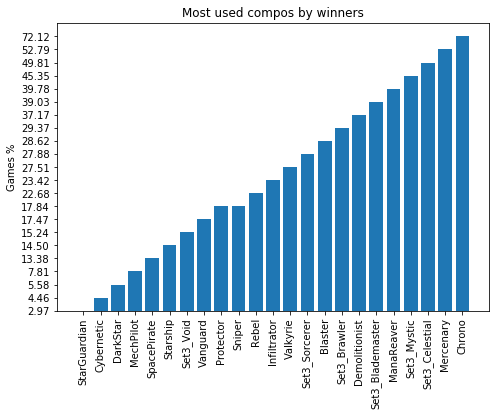

In [550]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = sortedComp
students = sortedResult
plt.xticks(rotation=90)
plt.ylabel("Games %")
plt.title("Most used compos by winners")
ax.bar(langs,students)